In [1]:
#RFV not useful precipitation, use PRCP, RFV has all zero values
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

sad= pd.read_csv('C:/Users/hp/OneDrive - Universiteit Utrecht/Desktop/Internship/APEX_local/TxtInOut_APEX1501_modified/TxtInOut/SITE14.SAD', delimiter=r'\s+', skiprows=9)
#dhy = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_exdata/TxtInOut/SITE14.DHY', delimiter=r'\s+', skiprows=8)
#sad = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_modified/TxtInOut/SITE14.SAD', delimiter=r'\s+', skiprows=9)
#sad=pd.read_csv('C:/Users/shahi/Downloads/apex-0806-editor-09232015 (original safecopy)/ApexEditor(09232015)/ex2_LemoTZ/OUTPUT.SAD',
#                delimiter=r'\s+', skiprows=9)
#sad= pd.read_csv('C:/Users/shahi/Downloads/APEX_China/SITE1.SAD', delimiter=r'\s+', skiprows=9)
#sad = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_modified_17_6_DLY issues/TxtInOut/SITE14.SAD', delimiter=r'\s+', skiprows=9)
#dhy.columns=dhy.columns.str.strip()
sad.columns=sad.columns.str.strip()
sad.head(10)

,#,ID,Y,M,D,CPNM,HUI,LAI,RD,RW,...,STDO,RSD,RSVQ,RSVY,RSSA,SWLT,SNO,RSDM,GWSN,ZSLT
0,1,1,2021,1,1,CORN,0.0,0.0,0.0,0.0,...,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2021,1,1,RYEG,0.0,0.0,0.0,0.0,...,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,2021,1,1,CORN,0.0,0.0,0.0,0.0,...,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2,2021,1,1,RYEG,0.0,0.0,0.0,0.0,...,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,3,2021,1,1,CORN,0.0,0.0,0.0,0.0,...,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3,3,2021,1,1,RYEG,0.0,0.0,0.0,0.0,...,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4,4,2021,1,1,CORN,0.0,0.0,0.0,0.0,...,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4,4,2021,1,1,RYEG,0.0,0.0,0.0,0.0,...,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5,5,2021,1,1,CORN,0.0,0.0,0.0,0.0,...,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5,5,2021,1,1,RYEG,0.0,0.0,0.0,0.0,...,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# sub_dhy = dhy[dhy['ISA']==1]
# sub_dhy.rename(columns={'Y':'Year','M':'Month', 'D':'Day'},inplace=True)
# sub_dhy['DATE']=pd.to_datetime(sub_dhy[['Year','Month','Day']])
# sub_dhy['RFV_C']=sub_dhy['RFVmm'].cumsum()
# sub_dhy['Q_C']=sub_dhy['Qmm'].cumsum()*(-1)
# sub_dhy

sub_sad = sad[sad['#']==1]
sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])
# sub_sad['RFV_C']=sub_sad['RFV'].cumsum()
# sub_sad['PRCP_C']=sub_sad['PRCP'].cumsum()
# sub_sad['WYLD_C']=sub_sad['WYLD'].cumsum()
# sub_sad['INFLOW_C']=(sub_sad['IRGA']+sub_sad['DPRK']+sub_sad['RSSF']+sub_sad['PSOQ']+sub_sad['GWST']+sub_sad['SWLT']+sub_sad['SNO']).cumsum()
# sub_sad['OUTFLOW_C']=(sub_sad['ET']+sub_sad['SSF']+sub_sad['PRK']).cumsum()*(-1)


# inflow_param = {'PRCP','SNOM', 'SNOF', 'PET','ET','EP','Q','SSF','SSF','PRK',
#                'QDR','IRGA','QIN','TLGE','TLGW','TLGQ','TLGF','EPP','RSQI','RSQO','RSEV',
#                'RSLK','DPRK','RSSF','QFP','QRF','RFIC','RSBK','CPVH','CPVV','RFV','PSOQ',
#                'IRDL','WYLD','RZSW'}
inflow_param= {'PRCP', 'IRGA'}
outflow_param = {'ET','WYLD','DPRK'}
#sub_sad['INFLOW_C']=sub_sad['PRCP']+sub_sad['SNOF']+sub_sad['SNOM']+sub_sad['PRK']
for var in inflow_param:
    sub_sad[f'{var}_C']=sub_sad[var].cumsum()
for var in outflow_param:
    sub_sad[f'{var}_C']=sub_sad[var].cumsum() * (-1)
# sub_sad['OUTFLOW_C']=sub_sad[]
#sub_sad['Q_C']=sub_sad['Q'].cumsum() * (-1)
pd.set_option('display.max_columns', None)
sub_sad.tail(1)

C:\Users\hp\AppData\Local\Temp\ipykernel_16740\4160179845.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_16740\4160179845.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])
C:\Users\hp\AppData\Local\Temp\ipykernel_16740\4160179845.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,#,ID,Year,Month,Day,CPNM,HUI,LAI,RD,RW,BIOM,STL,CPHT,STD,STDL,WS,NS,PS,KS,TS,AS,SALT,REG,PRCP,SNOF,SNOM,PET,ET,EP,Q,SSF,PRK,QDR,IRGA,QIN,TLGE,TLGW,TLGQ,TLGF,EPP,RSQI,RSQO,RSEV,RSLK,DPRK,RSSF,QFP,QRF,RFIC,RSBK,CPVH,CPVV,RFV,PSOQ,IRDL,WYLD,SW,RSYO,RSYD,QRP,YRP,YNRP,YPRP,ZNH3,ZNO3,ZPML,ZSK,UNM,UPM,UKM,RZSW,WTBL,GWST,STDO,RSD,RSVQ,RSVY,RSSA,SWLT,SNO,RSDM,GWSN,ZSLT,DATE,IRGA_C,PRCP_C,DPRK_C,WYLD_C,ET_C
15317,1,1,2023,12,31,CORN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1,0.0,0.0,0.3305,0.3145,0.0036,0.0,0.0,0.6264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0083,0.0,0.0,0.0,0.0,1.2844,0.5505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5505,8.8297,0.0,0.0,0.0,0.0,0.0,0.0,12.2947,31.8715,1.6152,0.0035,0.9031,0.1435,0.0863,8.8297,1.3328,174.4646,0.0004,0.0693,0.0,0.0,0.0,0.0,0.0,0.0856,487.0431,0.0,2023-12-31,0.0,2955.8,-1234.0482,-485.3364,-1241.8406


In [3]:
#Storage changes
#sub_sad['GWST']=sub_sad['GWST']/10
storage_param={'SW','GWST','SWLT','SNO','RZSW'}
for var in storage_param:
     sub_sad[var] = pd.to_numeric(sub_sad[var], errors='coerce')
     sub_sad[f'{var}_DIF']=sub_sad[var].diff().cumsum() * (-1) #initial-final storage, so multiplied by -1
sub_sad['GWST_SELF']=(sub_sad['DPRK']+sub_sad['RSSF']-sub_sad['RZSW']).diff().cumsum()
sub_sad.tail(1)


C:\Users\hp\AppData\Local\Temp\ipykernel_16740\574806348.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad[var] = pd.to_numeric(sub_sad[var], errors='coerce')
C:\Users\hp\AppData\Local\Temp\ipykernel_16740\574806348.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad[f'{var}_DIF']=sub_sad[var].diff().cumsum() * (-1) #initial-final storage, so multiplied by -1
C:\Users\hp\AppData\Local\Temp\ipykernel_16740\574806348.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,#,ID,Year,Month,Day,CPNM,HUI,LAI,RD,RW,BIOM,STL,CPHT,STD,STDL,WS,NS,PS,KS,TS,AS,SALT,REG,PRCP,SNOF,SNOM,PET,ET,EP,Q,SSF,PRK,QDR,IRGA,QIN,TLGE,TLGW,TLGQ,TLGF,EPP,RSQI,RSQO,RSEV,RSLK,DPRK,RSSF,QFP,QRF,RFIC,RSBK,CPVH,CPVV,RFV,PSOQ,IRDL,WYLD,SW,RSYO,RSYD,QRP,YRP,YNRP,YPRP,ZNH3,ZNO3,ZPML,ZSK,UNM,UPM,UKM,RZSW,WTBL,GWST,STDO,RSD,RSVQ,RSVY,RSSA,SWLT,SNO,RSDM,GWSN,ZSLT,DATE,IRGA_C,PRCP_C,DPRK_C,WYLD_C,ET_C,RZSW_DIF,SNO_DIF,SWLT_DIF,GWST_DIF,SW_DIF,GWST_SELF
15317,1,1,2023,12,31,CORN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1,0.0,0.0,0.3305,0.3145,0.0036,0.0,0.0,0.6264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0083,0.0,0.0,0.0,0.0,1.2844,0.5505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5505,8.8297,0.0,0.0,0.0,0.0,0.0,0.0,12.2947,31.8715,1.6152,0.0035,0.9031,0.1435,0.0863,8.8297,1.3328,174.4646,0.0004,0.0693,0.0,0.0,0.0,0.0,0.0,0.0856,487.0431,0.0,2023-12-31,0.0,2955.8,-1234.0482,-485.3364,-1241.8406,-6.7695,-0.0,-0.0,96.9866,-6.7695,-7.7895


<function matplotlib.pyplot.show(close=None, block=None)>

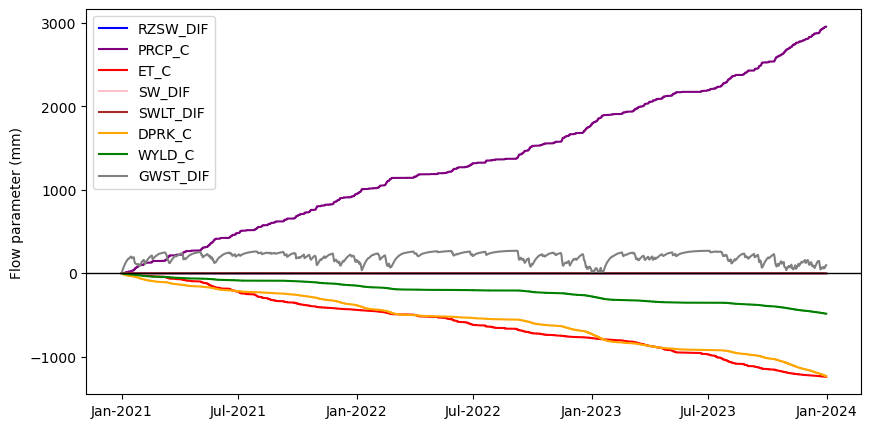

In [4]:
import matplotlib.cm as cm
fig,ax=plt.subplots(1,1,figsize=(10,5))
n_lines = len(sub_sad.columns[84:])
#colors = cm.get_cmap('tab20',n_lines)
colors=['blue','purple','red','pink','brown','orange','green','grey']
var={'PRCP_C','ET_C','WYLD_C','DPRK_C','SW_DIF','RZSW_DIF','GWST_DIF','SWLT_DIF'}
#for i, var in enumerate(sub_sad.columns[84:]):
for i,j in enumerate(var):
    plt.plot(sub_sad['DATE'], sub_sad[j], color=colors[i], label=j)
    plt.errorbar(sub_sad['DATE'], sub_sad[j], ls="None")
#plt.plot(sub_sad['DATE'], sub_sad['PRCP_C'])
plt.xticks
plt.axhline(y=0, linewidth=1, color='k')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.ylabel("Flow parameter (mm)")
ax.legend()
plt.show

189.83400927364056
856.3279496036184
       #  ID  Year  Month  Day  CPNM     HUI     LAI      RD      RW    BIOM  \
15289  1   1  2023     12   29  CORN  0.0000  0.0000  0.0000  0.0000  0.0000   
15302  1   1  2023     12   30  RYEG  0.1674  0.0325  0.5441  0.0056  0.0132   
15303  1   1  2023     12   30  CORN  0.0000  0.0000  0.0000  0.0000  0.0000   
15316  1   1  2023     12   31  RYEG  0.1719  0.0326  0.5588  0.0056  0.0132   
15317  1   1  2023     12   31  CORN  0.0000  0.0000  0.0000  0.0000  0.0000   

          STL  CPHT     STD  STDL   WS   NS   PS   KS      TS   AS  SALT  \
15289  0.0000   0.0  0.0000   0.0  0.0  0.0  0.0  0.0  0.0000  0.0   0.0   
15302  0.0075   0.0  0.0319   0.0  1.0  1.0  1.0  1.0  0.6360  1.0   1.0   
15303  0.0000   0.0  0.0000   0.0  0.0  0.0  0.0  0.0  0.0000  0.0   0.0   
15316  0.0076   0.0  0.0319   0.0  1.0  1.0  1.0  1.0  0.7071  1.0   1.0   
15317  0.0000   0.0  0.0000   0.0  0.0  0.0  0.0  0.0  0.0000  0.0   0.0   

          REG  PRCP  SNOF

C:\Users\hp\AppData\Local\Temp\ipykernel_16740\1903336620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['INFLOW']=sub_sad['PRCP']
C:\Users\hp\AppData\Local\Temp\ipykernel_16740\1903336620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['OUTFLOW']=sub_sad['ET']+sub_sad['WYLD']+sub_sad['DPRK']
C:\Users\hp\AppData\Local\Temp\ipykernel_16740\1903336620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

<function matplotlib.pyplot.show(close=None, block=None)>

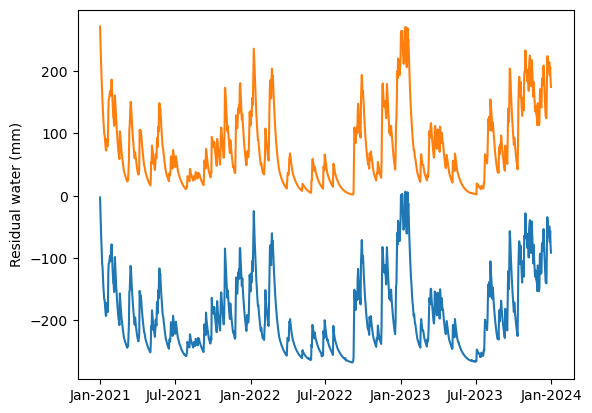

In [5]:
sub_sad['INFLOW']=sub_sad['PRCP']
sub_sad['OUTFLOW']=sub_sad['ET']+sub_sad['WYLD']+sub_sad['DPRK']
sub_sad['DIFF_STOR']= sub_sad['SW_DIF']+sub_sad['SWLT_DIF']+sub_sad['GWST_DIF']
#sub_sad['DIFF_STOR'] = sub_sad['SW_DIF']+sub_sad['SWLT_DIF']
sub_sad['RESIDUAL']=sub_sad['INFLOW']-sub_sad['OUTFLOW']-sub_sad['DIFF_STOR']
sub_sad['ABS_RESIDUAL']=sub_sad['RESIDUAL'].abs()
sub_sad['RESIDUAL_PER']=sub_sad['ABS_RESIDUAL']/sub_sad['GWST']*100
print(sub_sad['ABS_RESIDUAL'].mean())
print(sub_sad['RESIDUAL_PER'].mean())
print(sub_sad.tail())
fig1,ax1=plt.subplots()
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.plot(sub_sad['DATE'], sub_sad['RESIDUAL'], label="residual")
plt.plot(sub_sad['DATE'], sub_sad['GWST'], label="groundwater storage")
plt.ylabel("Residual water (mm)")
#plt.plot(sub_sad['DATE'], sub_sad['INFLOW'])
#plt.plot(sub_sad['DATE'], sub_sad['OUTFLOW'])
#plt.plot(sub_sad['DATE'], sub_sad['DIFF_STOR'])
plt.show

In [6]:
#sub_sad.to_csv("C:/Users/shahi/Downloads/TxtInOut_APEX1501_modified/TxtInOut/sub_1_water_balance.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

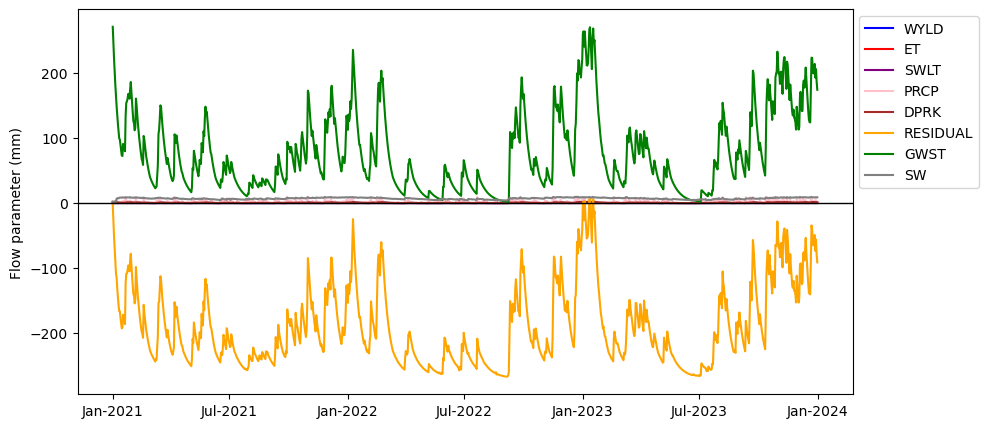

In [7]:
#import matplotlib.cm as cm
fig,ax=plt.subplots(1,1, figsize=(10,5))
n_lines = len(sub_sad.columns[84:])
#colors = cm.get_cmap('tab20',n_lines)
colors=['blue','red','purple','pink','brown','orange','green','grey','turquoise']
#var={'PRCP_C','ET_C','WYLD_C','DPRK_C','SW_DIF','RZSW_DIF','GWST_DIF','SWLT_DIF'}
var={'PRCP','ET','WYLD','DPRK','SW','GWST','SWLT','RESIDUAL'}
#var={'PRCP','WYLD','DPRK','SWLT'}
#for i, var in enumerate(sub_sad.columns[84:]):
for i,j in enumerate(var):
    plt.plot(sub_sad['DATE'], sub_sad[j], color=colors[i], label=j)
    plt.errorbar(sub_sad['DATE'], sub_sad[j], ls="None")
#plt.plot(sub_sad['DATE'], sub_sad['PRCP_C'])
plt.xticks
plt.axhline(y=0, linewidth=1, color='k')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.ylabel("Flow parameter (mm)")
ax.legend()
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show

In [8]:
inflow = {'PRCP','SNOF','SNOM','IRGA','QIN', 'RSQI', 'RSSF','RFV','PSOQ','RFIC'}
outflow = {'PET','ET','EP','Q','SSF','PRK','QDR','TLGE','TLGW', 'TLGQ','TLGF','EPP',
                 'RSQO','RSLK','DPRK','QFP','QRF','CPVH','CPVV','IRDL','WYLD'}
storage = {'RSEV','RSBK','SW','RZSW','GWST','RSVQ','SWLT','SNO'}

sub_sad = sad[sad['#']==1]
sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])

#sub_sad['INFLOW_C']=sub_sad['PRCP']+sub_sad['SNOF']+sub_sad['SNOM']+sub_sad['PRK']
for var in inflow:
    sub_sad[f'{var}_C']=sub_sad[var].cumsum()
for var in outflow:
    sub_sad[f'{var}_C']=sub_sad[var].cumsum() * (-1)
for var in storage:
     sub_sad[f'{var}_DIF']=sub_sad[var].diff().cumsum()
# sub_sad['OUTFLOW_C']=sub_sad[]
#sub_sad['Q_C']=sub_sad['Q'].cumsum() * (-1)
pd.set_option('display.max_columns', None)
sub_sad.tail(1)

C:\Users\hp\AppData\Local\Temp\ipykernel_16740\4049812197.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_16740\4049812197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])
C:\Users\hp\AppData\Local\Temp\ipykernel_16740\4049812197.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,#,ID,Year,Month,Day,CPNM,HUI,LAI,RD,RW,BIOM,STL,CPHT,STD,STDL,WS,NS,PS,KS,TS,AS,SALT,REG,PRCP,SNOF,SNOM,PET,ET,EP,Q,SSF,PRK,QDR,IRGA,QIN,TLGE,TLGW,TLGQ,TLGF,EPP,RSQI,RSQO,RSEV,RSLK,DPRK,RSSF,QFP,QRF,RFIC,RSBK,CPVH,CPVV,RFV,PSOQ,IRDL,WYLD,SW,RSYO,RSYD,QRP,YRP,YNRP,YPRP,ZNH3,ZNO3,ZPML,ZSK,UNM,UPM,UKM,RZSW,WTBL,GWST,STDO,RSD,RSVQ,RSVY,RSSA,SWLT,SNO,RSDM,GWSN,ZSLT,DATE,PRCP_C,IRGA_C,PSOQ_C,QIN_C,RFV_C,RSQI_C,RFIC_C,RSSF_C,SNOM_C,SNOF_C,CPVH_C,ET_C,WYLD_C,QFP_C,TLGF_C,Q_C,CPVV_C,PET_C,TLGQ_C,IRDL_C,EPP_C,RSQO_C,PRK_C,TLGE_C,SSF_C,RSLK_C,DPRK_C,QDR_C,TLGW_C,QRF_C,EP_C,RZSW_DIF,SNO_DIF,SWLT_DIF,SW_DIF,RSBK_DIF,GWST_DIF,RSEV_DIF,RSVQ_DIF
15317,1,1,2023,12,31,CORN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1,0.0,0.0,0.3305,0.3145,0.0036,0.0,0.0,0.6264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0083,0.0,0.0,0.0,0.0,1.2844,0.5505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5505,8.8297,0.0,0.0,0.0,0.0,0.0,0.0,12.2947,31.8715,1.6152,0.0035,0.9031,0.1435,0.0863,8.8297,1.3328,174.4646,0.0004,0.0693,0.0,0.0,0.0,0.0,0.0,0.0856,487.0431,0.0,2023-12-31,2955.8,0.0,0.0,0.0,0.0,0.0,0.0,485.3124,9.6736,27.9668,-0.0,-1241.8406,-485.3364,-0.0,-0.0,-0.0,-0.0,-6871.3976,-0.0,-0.0,-27.698,-0.0,-1700.2266,-0.0,-0.0,-0.0,-1234.0482,-0.0,-0.0,-0.0192,-2.3518,6.7695,0.0,0.0,6.7695,0.0,-96.9866,0.0,0.0
